<a href="https://colab.research.google.com/github/jrsales2024/KNNIA/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_knn_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1797, 64)


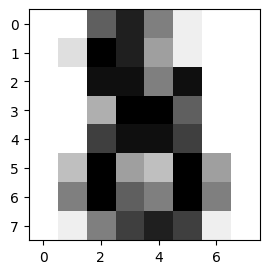

Numeros de amostras totais: 1797
Amostras de treino: 1437
Amostras de teste: 360
Modelo treinado com sucesso!


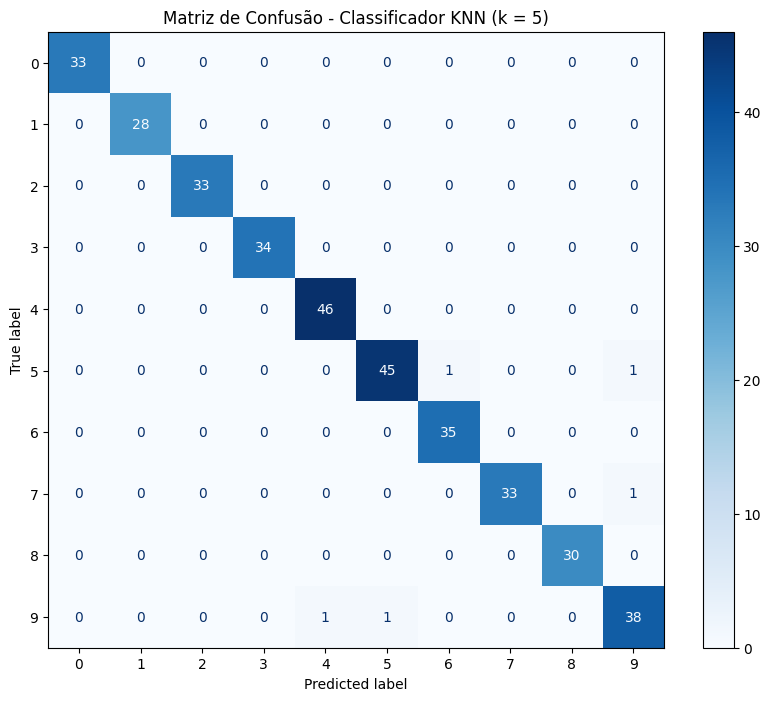


Relatório de Classificação:

Acuárias 0.9861111111111112
Precisão 0.9879206496042758
Recall 0.9878035043804756
F1-score 0.9877979367135247
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [ ]:
from re import X
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)



data = load_digits()
X= data.data
y = data.target

print(X.shape)

plt.figure(1, figsize=(3,3))
plt.imshow(data.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

df = pd.DataFrame(x, columns=[f'pixel_{i}' for i in range (x.shape[1])])
df ['target'] = y
df.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Numeros de amostras totais: {len(x)}")
print(f"Amostras de treino: {len(X_train)}")
print(f"Amostras de teste: {len(X_test)}")

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Modelo treinado com sucesso!")

# 1. Fazer as previsões usando o conjunto de teste
y_pred = knn.predict(X_test)

# 2. Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# 3. Exibir de forma visual
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.title('Matriz de Confusão - Classificador KNN (k = 5)')
plt.show()

# 4. Exibir o relatório completo de métricas
print("\nRelatório de Classificação:\n")
print("Acuárias", accuracy_score(y_test, y_pred))
print("Precisão", precision_score(y_test, y_pred, average='macro'))
print("Recall", recall_score(y_test, y_pred, average='macro'))
print("F1-score", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))



